<a href="https://colab.research.google.com/github/lmcanavals/acomplex/blob/main/0503_dls_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def dls(G, s, L):
  n = len(G)
  visited = [False]*n
  path = [-1]*n

  def _dls(u, L):
    if L > 0 and not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          path[v] = u
          _dls(v, L - 1)

  _dls(s, L)
  return path

In [ ]:
import graphviz as gv

In [18]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for edge in G[u]:
      if weighted:
        v, w = edge
      else:
        v = edge
      draw = False
      if not directed and not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed and not f"{u},{v}" in added:
        added.add(f"{u},{v}")
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

In [19]:
%%file 0503.al
1 4
-
-
2 6 17
7
2
10
0 8
4
8
-
8 14
16
9 17
15
11 17
15 17
13

Overwriting 0503.al


In [20]:
with open("0503.al") as f:
  G = []
  for line in f:
    if line == "-\n":
      G.append([])
    else:
      G.append([int(x) for x in line.split()])

for x in G:
  print(x)

[1, 4]
[]
[]
[2, 6, 17]
[7]
[2]
[10]
[0, 8]
[4]
[8]
[]
[8, 14]
[16]
[9, 17]
[15]
[11, 17]
[15, 17]
[13]


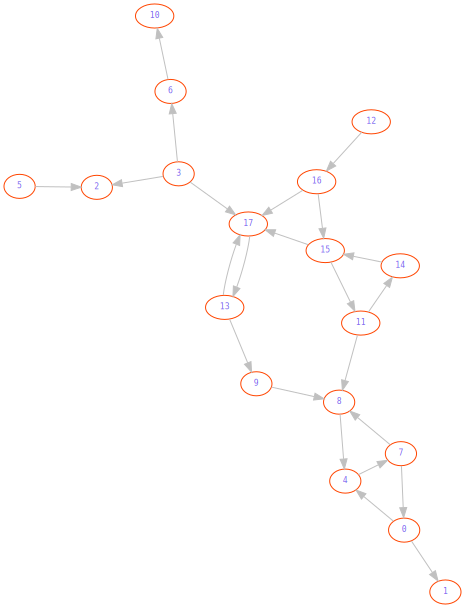

In [22]:
drawG_al(G, directed=True, layout="neato")

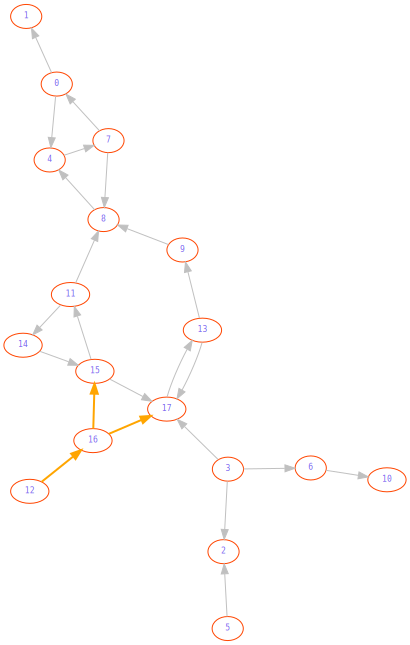

In [23]:
path = dls(G, 12, 2)
drawG_al(G, directed=True, path=path, layout="neato")

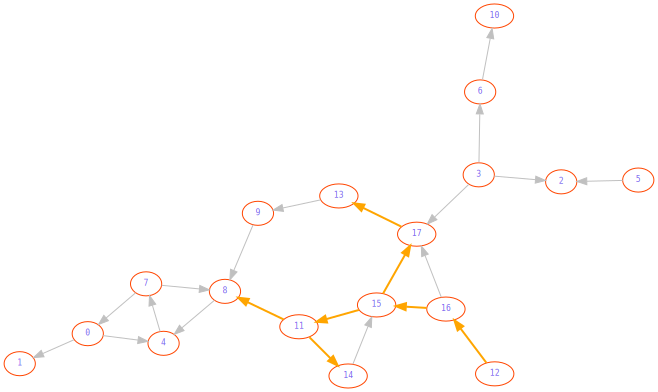

In [24]:
path = dls(G, 12, 4)
drawG_al(G, directed=True, path=path, layout="neato")

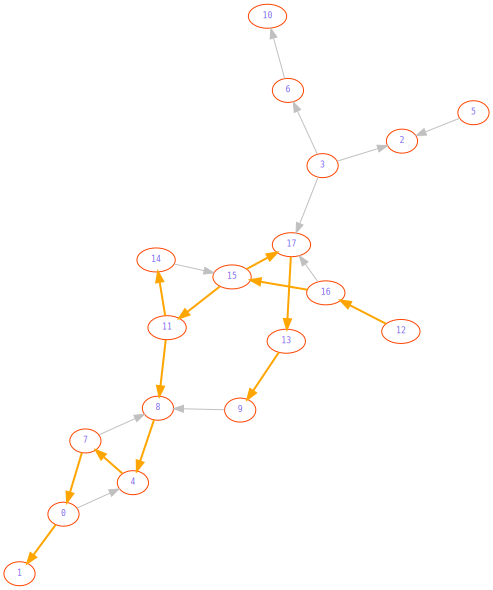

In [25]:
path = dls(G, 12, 100)
drawG_al(G, directed=True, path=path, layout="neato")

# IDS

In [26]:
def ids(G, start, target):
  n = len(G)
  for limit in range(n):
    path = dls(G, start, limit)
    if path[target] != -1:
      break
  return path

[-1, -1, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


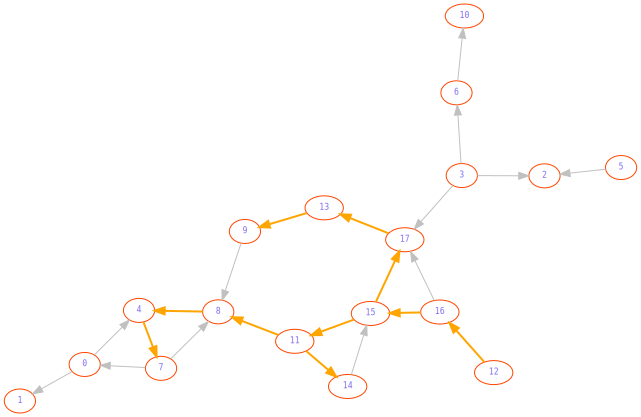

In [27]:
path = ids(G, start=12, target=7)
print(path)
drawG_al(G, directed=True, path=path, layout="neato")

[7, 0, -1, -1, 8, -1, -1, 4, 11, 13, -1, 15, -1, 17, 11, 16, 12, 15]


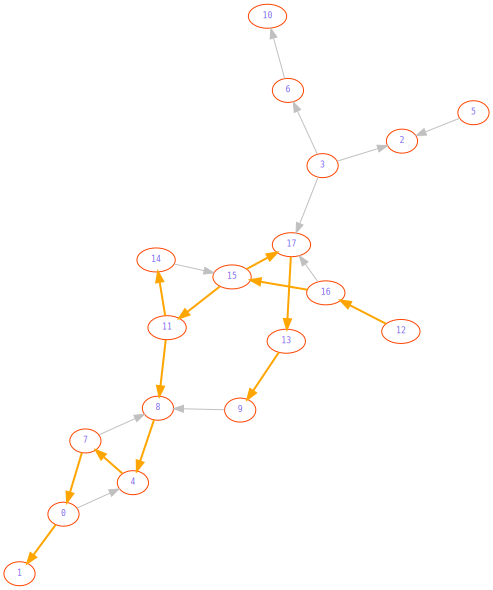

In [28]:
path = ids(G, start=12, target=10)
print(path)
drawG_al(G, directed=True, path=path, layout="neato")